In [67]:
import pandas as pd
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [68]:
pd.set_option('display.max_columns', 500)

data_path = os.getcwd()[:-len('notebooks')] + 'Data/'
os.listdir(data_path)

['Beijing_winter_Olympic_Games',
 'BI',
 'Liverpool',
 'RedDim',
 'Taxi',
 'Taxis',
 'TempFuturas',
 'transactional_data']

In [69]:
db_Temp_path = data_path + 'TempFuturas/'
os.listdir(db_Temp_path)

['FinalGraphTemp.csv',
 'FinalGraphTemp.xlsx',
 'GlobalTemperatures.csv',
 'GlobalTemperaturesGZ.csv',
 'GlobalTemperaturesGZ.xlsx',
 '~$GlobalTemperaturesGZ.xlsx']

In [70]:
temperatures = pd.read_csv(db_Temp_path + 'GlobalTemperatures.csv')
temperatures.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [72]:
max(temperatures.dt)

'2015-12-01'

In [73]:
temperatures.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [74]:
temperatures.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [75]:
temperatures['Date'] = pd.to_datetime(temperatures.dt, format='%Y-%d-%m')
temperatures['Year'] = temperatures['Date'].dt.year
temperatures['Date'] = temperatures['Date'].map(dt.datetime.toordinal)

In [76]:
df = temperatures.groupby('Year')['LandAverageTemperature'].mean().reset_index()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    266 non-null    int64  
 1   LandAverageTemperature  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [78]:
df.iloc[260]

Year                      2010.000000
LandAverageTemperature       9.703083
Name: 260, dtype: float64

In [79]:
df1 = df.copy()
df1

,Year,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


In [80]:
df1.to_csv('dataPrueba.csv',index=False)

<AxesSubplot: >

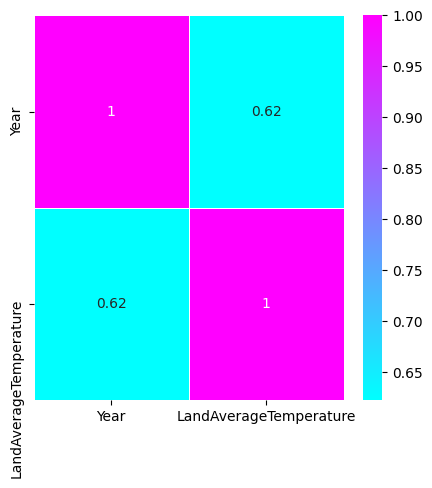

In [81]:
import seaborn as sns
plt.figure(figsize = (5, 5))
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap = plt.cm.cool)

In [82]:
corr, p = pearsonr(df['Year'], df['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.6223364823755806


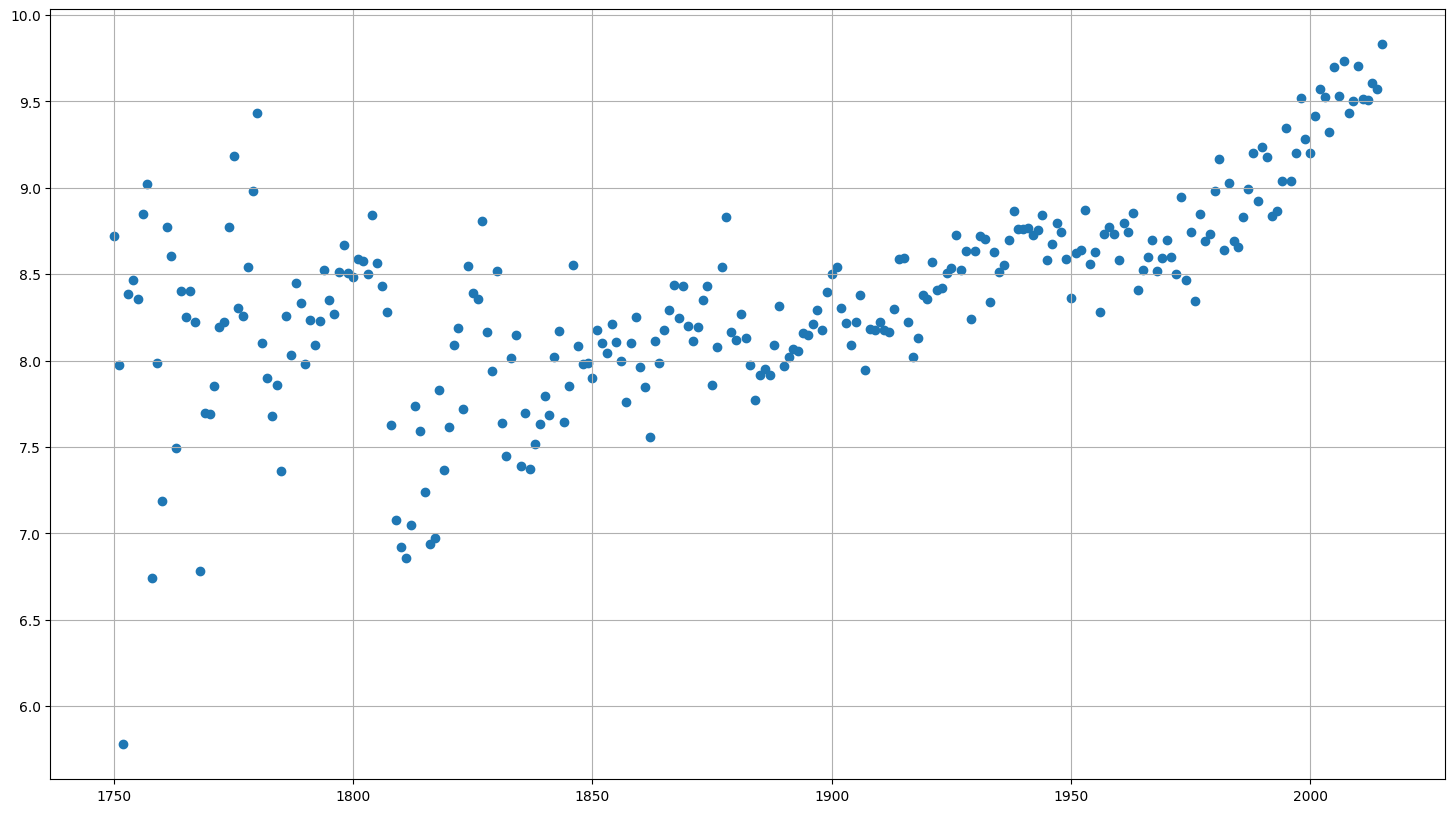

In [83]:
plt.figure(figsize=(18,10))
plt.scatter(data = df, x = 'Year',y = 'LandAverageTemperature')
plt.grid()
plt.show()

In [84]:
df_GZ = pd.read_csv(db_Temp_path + 'GlobalTemperaturesGZ.csv')
df_GZ.head()

,Ano,T en C°,T en K°,T_Teo_K,T_exp_C,Diff,T_exp_corr
0,1975,8.744833,281.894833,282.351,9.201,0.456167,8.41253
1,1976,8.347250,281.497250,282.385,9.235,0.887750,8.44653
2,1977,8.850250,282.000250,282.420,9.270,0.419750,8.48153
3,1978,8.692750,281.842750,282.455,9.305,0.612250,8.51653
4,1979,8.733417,281.883417,282.490,9.340,0.606583,8.55153


In [85]:
df_GZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ano         41 non-null     int64  
 1   T en C°     41 non-null     float64
 2   T en K°     41 non-null     float64
 3   T_Teo_K     41 non-null     float64
 4   T_exp_C     41 non-null     float64
 5   Diff        41 non-null     float64
 6   T_exp_corr  41 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.4 KB


In [86]:
df_GZ.head()

,Ano,T en C°,T en K°,T_Teo_K,T_exp_C,Diff,T_exp_corr
0,1975,8.744833,281.894833,282.351,9.201,0.456167,8.41253
1,1976,8.347250,281.497250,282.385,9.235,0.887750,8.44653
2,1977,8.850250,282.000250,282.420,9.270,0.419750,8.48153
3,1978,8.692750,281.842750,282.455,9.305,0.612250,8.51653
4,1979,8.733417,281.883417,282.490,9.340,0.606583,8.55153


In [87]:
corr, p = pearsonr(df_GZ['Ano'], df_GZ['T_exp_corr'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.9969237829183024


<AxesSubplot: >

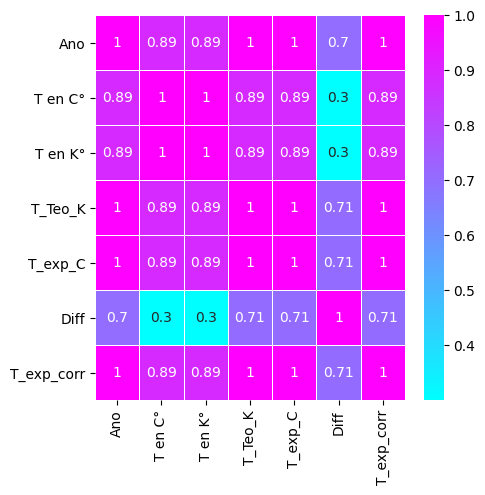

In [88]:
plt.figure(figsize = (5, 5))
sns.heatmap(df_GZ.corr(), annot = True, linewidths=.5, cmap = plt.cm.cool)

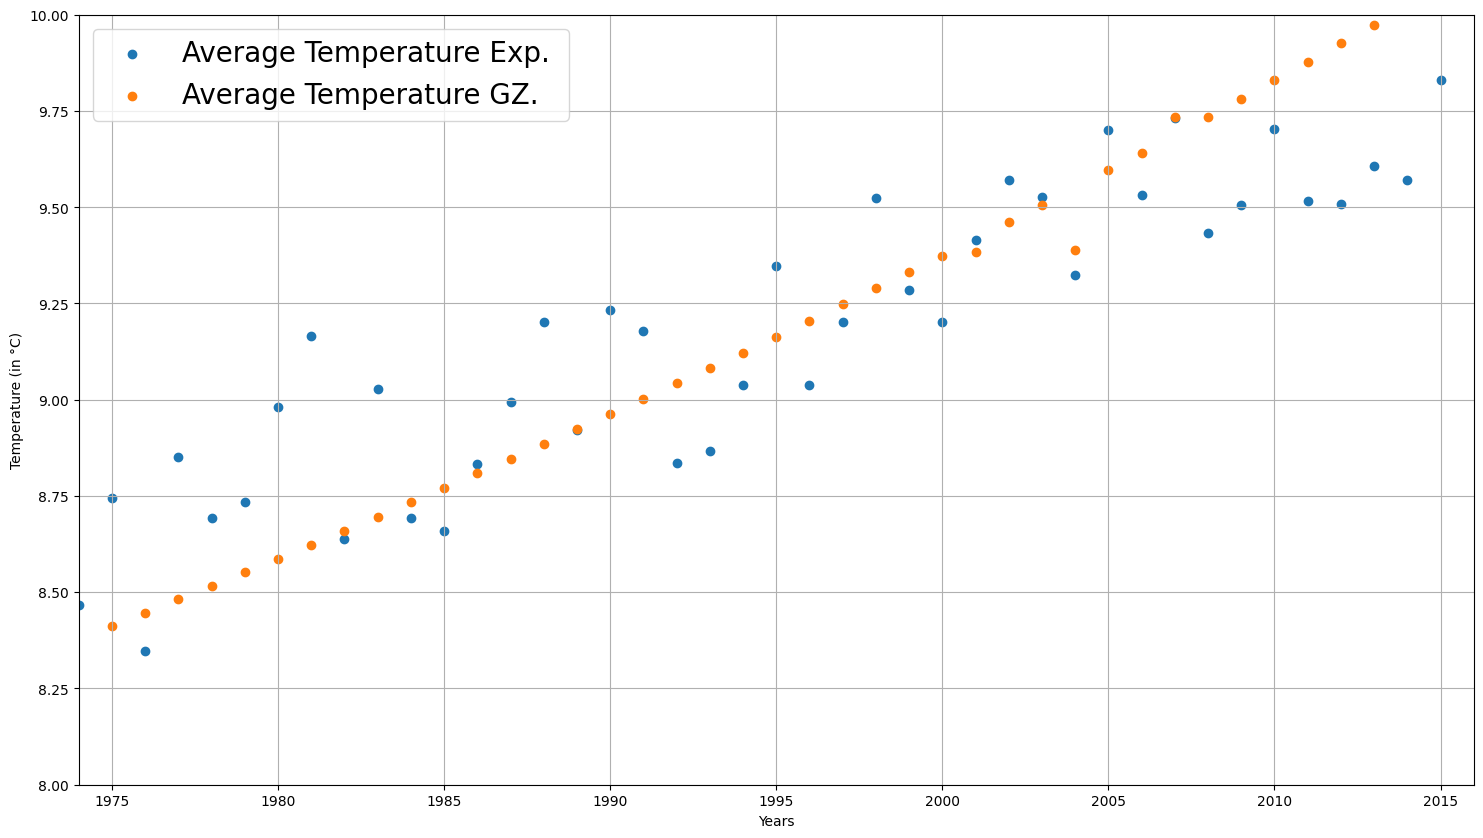

In [89]:
plt.figure(figsize=(18,10))
plt.scatter(data = df, x = 'Year',y = 'LandAverageTemperature',label='Average Temperature Exp. ')
plt.scatter(data = df_GZ, x = 'Ano',y = 'T_exp_corr',label='Average Temperature GZ.')
plt.legend(fontsize="20")

plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')

plt.grid()
plt.xlim(1974,2016)
plt.ylim(8,10)
plt.show()

## Linear Regression GZ

In [90]:
lrZ = LinearRegression()

In [91]:
#plt.scatter(data = df_GZ, x = 'Ano',y = 'T_exp_corr')
X = df_GZ['Ano']
y = df_GZ['T_exp_corr']

X = X.values.reshape(-1,1)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [93]:
lrZ.fit(X_train, y_train)
lrZ.score(X_test, y_test)

0.9963288697931262

In [94]:
y_pred = lrZ.predict(X_test)

In [95]:
years = pd.DataFrame(X_test)

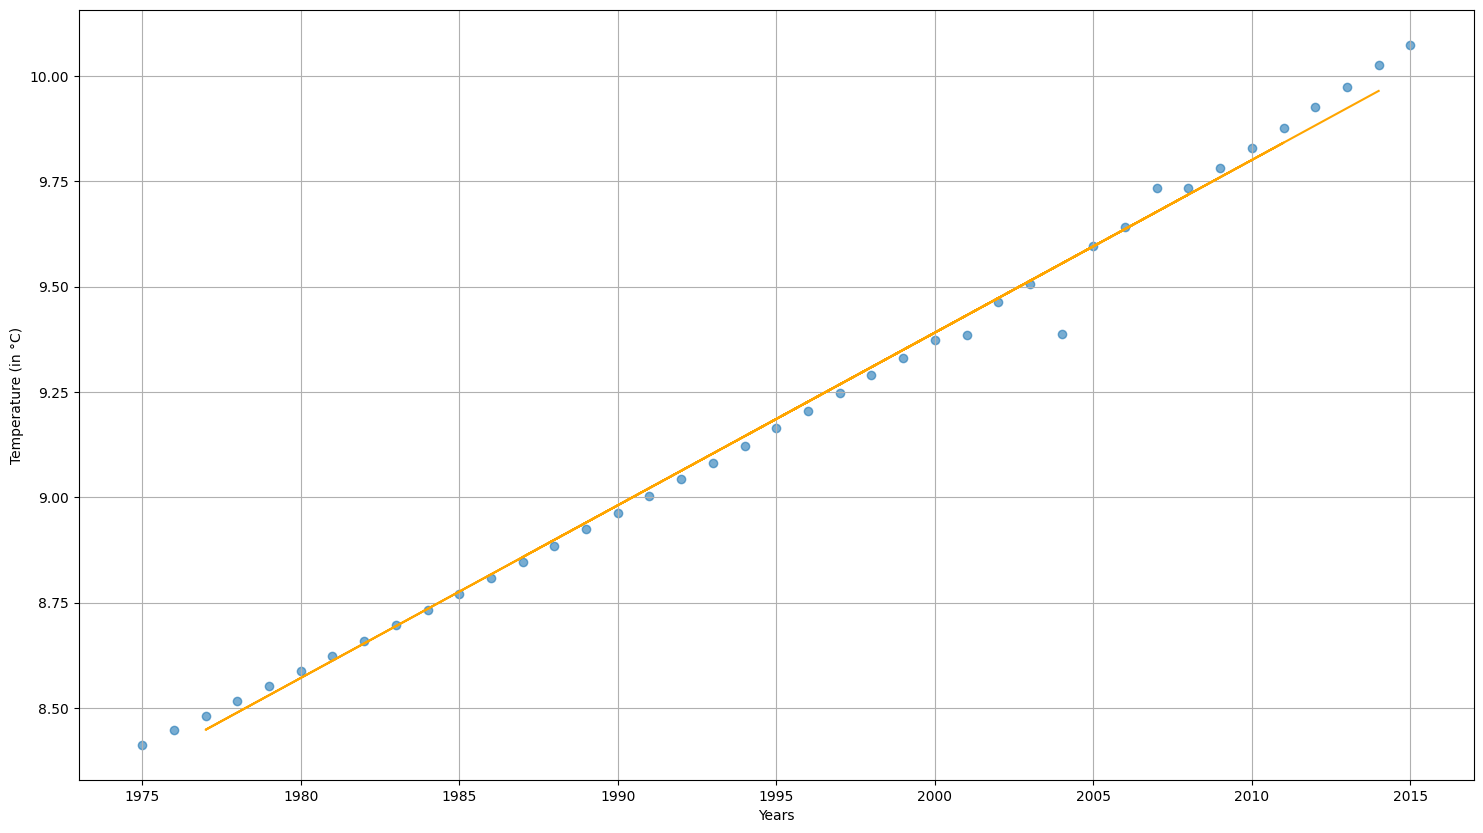

<Figure size 640x480 with 0 Axes>

In [96]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X_test, y_pred, color="orange")
plt.grid()
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [98]:
print(lrZ.predict(np.array([2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,
                            2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,
                            2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,
                            2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,
                            2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,
                            2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,
                            2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,
                            2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,
                            2100]).reshape(-1,1)))

[10.21084428 10.25183957 10.29283486 10.33383014 10.37482543 10.41582072
 10.45681601 10.49781129 10.53880658 10.57980187 10.62079716 10.66179244
 10.70278773 10.74378302 10.7847783  10.82577359 10.86676888 10.90776417
 10.94875945 10.98975474 11.03075003 11.07174532 11.1127406  11.15373589
 11.19473118 11.23572647 11.27672175 11.31771704 11.35871233 11.39970762
 11.4407029  11.48169819 11.52269348 11.56368876 11.60468405 11.64567934
 11.68667463 11.72766991 11.7686652  11.80966049 11.85065578 11.89165106
 11.93264635 11.97364164 12.01463693 12.05563221 12.0966275  12.13762279
 12.17861807 12.21961336 12.26060865 12.30160394 12.34259922 12.38359451
 12.4245898  12.46558509 12.50658037 12.54757566 12.58857095 12.62956624
 12.67056152 12.71155681 12.7525521  12.79354739 12.83454267 12.87553796
 12.91653325 12.95752853 12.99852382 13.03951911 13.0805144  13.12150968
 13.16250497 13.20350026 13.24449555 13.28549083 13.32648612 13.36748141
 13.4084767  13.44947198 13.49046727]


In [99]:
print("20-30")
print(lrZ.predict(np.array([2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,
                              2030]).reshape(-1,1)))
print("31-40")
print(lrZ.predict(np.array([2031,2032,2033,2034,2035,2036,2037,2038,2039,
                              2040]).reshape(-1,1)))
print("41-50")
print(lrZ.predict(np.array([2041,2042,2043,2044,2045,2046,2047,2048,2049,
                              2050]).reshape(-1,1)))
print("51-60")
print(lrZ.predict(np.array([2051,2052,2053,2054,2055,2056,2057,2058,2059,
                              2060]).reshape(-1,1)))
print("61-70")
print(lrZ.predict(np.array([2061,2062,2063,2064,2065,2066,2067,2068,2069,
                              2070]).reshape(-1,1)))
print("71-80")
print(lrZ.predict(np.array([2071,2072,2073,2074,2075,2076,2077,2078,2079,
                              2080]).reshape(-1,1)))
print("81-90")
print(lrZ.predict(np.array([2081,2082,2083,2084,2085,2086,2087,2088,2089,
                              2090]).reshape(-1,1)))
print("91-100")
print(lrZ.predict(np.array([2091,2092,2093,2094,2095,2096,2097,2098,2099,
                              2100]).reshape(-1,1)))

20-30
[10.21084428 10.25183957 10.29283486 10.33383014 10.37482543 10.41582072
 10.45681601 10.49781129 10.53880658 10.57980187 10.62079716]
31-40
[10.66179244 10.70278773 10.74378302 10.7847783  10.82577359 10.86676888
 10.90776417 10.94875945 10.98975474 11.03075003]
41-50
[11.07174532 11.1127406  11.15373589 11.19473118 11.23572647 11.27672175
 11.31771704 11.35871233 11.39970762 11.4407029 ]
51-60
[11.48169819 11.52269348 11.56368876 11.60468405 11.64567934 11.68667463
 11.72766991 11.7686652  11.80966049 11.85065578]
61-70
[11.89165106 11.93264635 11.97364164 12.01463693 12.05563221 12.0966275
 12.13762279 12.17861807 12.21961336 12.26060865]
71-80
[12.30160394 12.34259922 12.38359451 12.4245898  12.46558509 12.50658037
 12.54757566 12.58857095 12.62956624 12.67056152]
81-90
[12.71155681 12.7525521  12.79354739 12.83454267 12.87553796 12.91653325
 12.95752853 12.99852382 13.03951911 13.0805144 ]
91-100
[13.12150968 13.16250497 13.20350026 13.24449555 13.28549083 13.32648612
 13.36

## Linear Regression

In [100]:
lrT = LinearRegression()

In [101]:
X = df['Year']
y = df['LandAverageTemperature']

X = X.values.reshape(-1,1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [103]:
lrT.fit(X_train, y_train)
lrT.score(X_test, y_test)

0.27325787616185937

In [104]:
y_pred = lrT.predict(X_test)

In [105]:
years = pd.DataFrame(X_test)

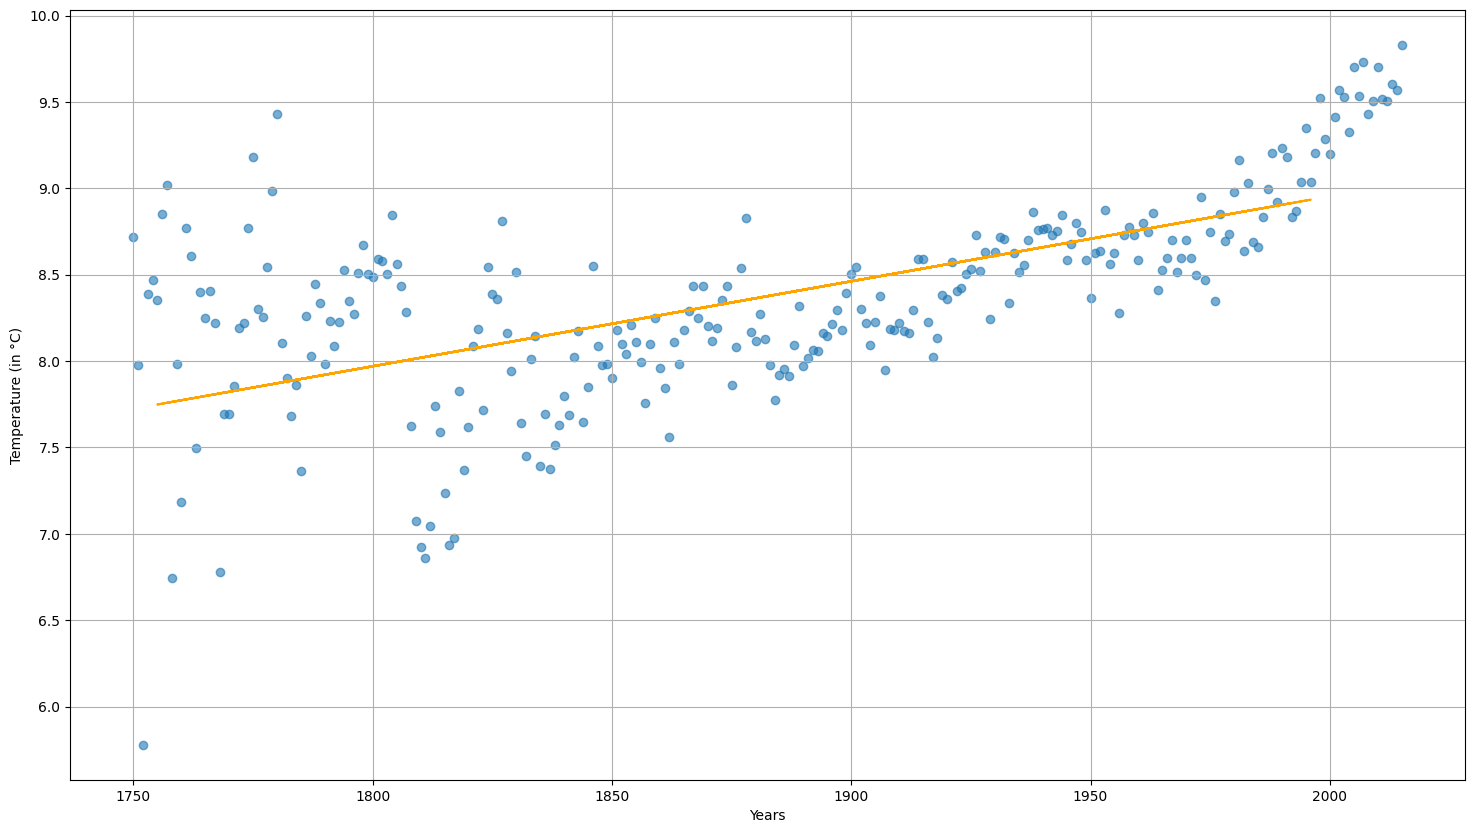

<Figure size 640x480 with 0 Axes>

In [106]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X_test, y_pred, color="orange")
plt.grid()
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [108]:
print(lrT.predict(np.array([2030, 2050,2070,2090,2100]).reshape(-1,1)))

[9.1014487  9.19982906 9.29820942 9.39658978 9.44577996]


In [109]:
print("20-30")
print(lrT.predict(np.array([2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,
                              2030]).reshape(-1,1)))
print("31-40")
print(lrT.predict(np.array([2031,2032,2033,2034,2035,2036,2037,2038,2039,
                              2040]).reshape(-1,1)))
print("41-50")
print(lrT.predict(np.array([2041,2042,2043,2044,2045,2046,2047,2048,2049,
                              2050]).reshape(-1,1)))
print("51-60")
print(lrT.predict(np.array([2051,2052,2053,2054,2055,2056,2057,2058,2059,
                              2060]).reshape(-1,1)))
print("61-70")
print(lrT.predict(np.array([2061,2062,2063,2064,2065,2066,2067,2068,2069,
                              2070]).reshape(-1,1)))
print("71-80")
print(lrT.predict(np.array([2071,2072,2073,2074,2075,2076,2077,2078,2079,
                              2080]).reshape(-1,1)))
print("81-90")
print(lrT.predict(np.array([2081,2082,2083,2084,2085,2086,2087,2088,2089,
                              2090]).reshape(-1,1)))
print("91-100")
print(lrT.predict(np.array([2091,2092,2093,2094,2095,2096,2097,2098,2099,
                              2100]).reshape(-1,1)))

20-30
[9.05225852 9.05717753 9.06209655 9.06701557 9.07193459 9.07685361
 9.08177262 9.08669164 9.09161066 9.09652968 9.1014487 ]
31-40
[9.10636772 9.11128673 9.11620575 9.12112477 9.12604379 9.13096281
 9.13588182 9.14080084 9.14571986 9.15063888]
41-50
[9.1555579  9.16047691 9.16539593 9.17031495 9.17523397 9.18015299
 9.185072   9.18999102 9.19491004 9.19982906]
51-60
[9.20474808 9.20966709 9.21458611 9.21950513 9.22442415 9.22934317
 9.23426218 9.2391812  9.24410022 9.24901924]
61-70
[9.25393826 9.25885728 9.26377629 9.26869531 9.27361433 9.27853335
 9.28345237 9.28837138 9.2932904  9.29820942]
71-80
[9.30312844 9.30804746 9.31296647 9.31788549 9.32280451 9.32772353
 9.33264255 9.33756156 9.34248058 9.3473996 ]
81-90
[9.35231862 9.35723764 9.36215665 9.36707567 9.37199469 9.37691371
 9.38183273 9.38675174 9.39167076 9.39658978]
91-100
[9.4015088  9.40642782 9.41134684 9.41626585 9.42118487 9.42610389
 9.43102291 9.43594193 9.44086094 9.44577996]


## Ridge Regression

In [110]:
from sklearn.linear_model import Ridge
ridge_reg_TR = Ridge(alpha = 0.01, solver="cholesky")

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [112]:
ridge_reg_TR.fit(X_train, y_train)
ridge_reg_TR.score(X_test, y_test)

0.30533434218363986

In [113]:
y_pred = ridge_reg_TR.predict(X_test)

In [114]:
years = pd.DataFrame(X_test)

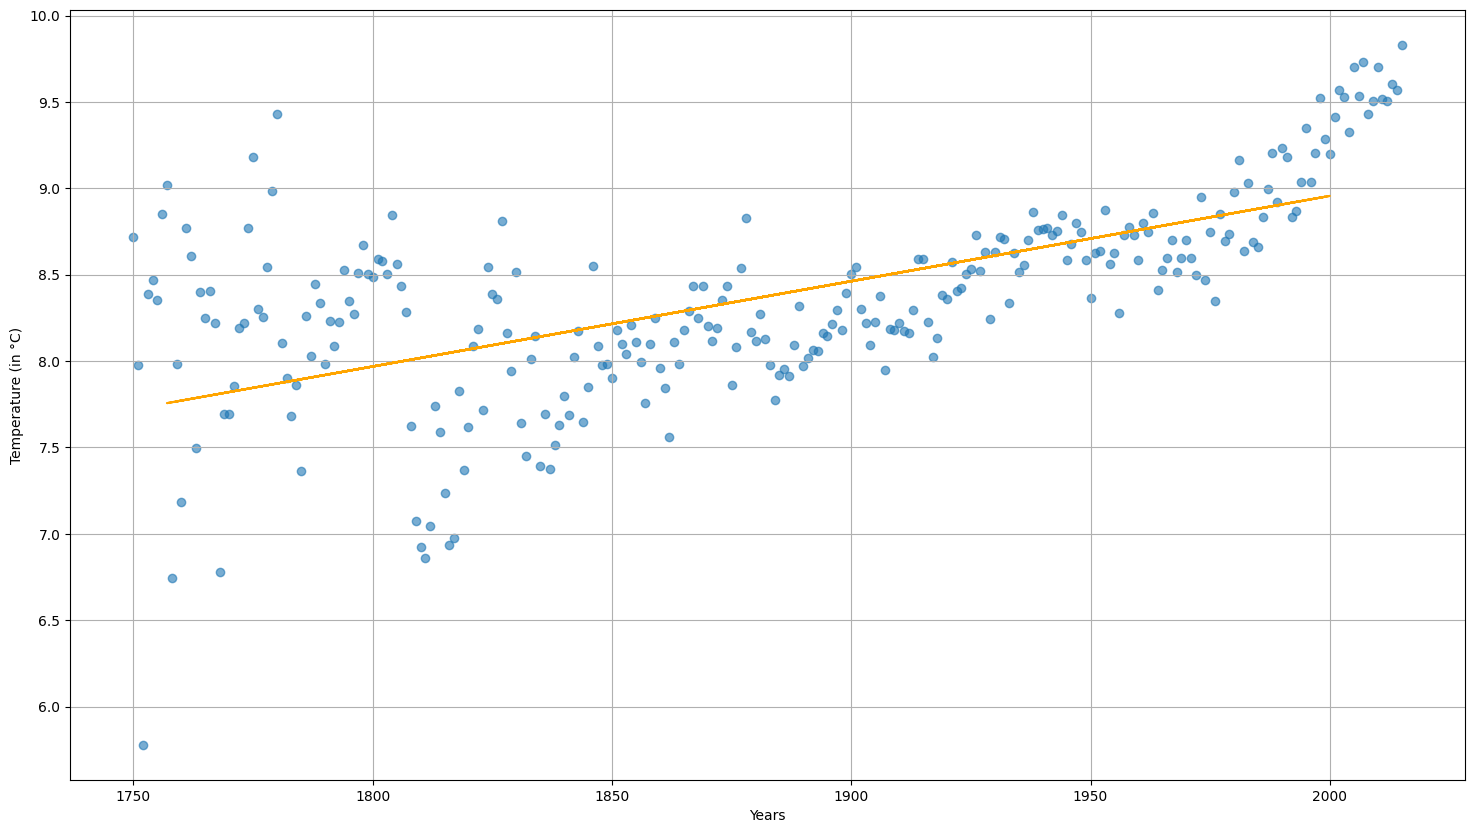

<Figure size 640x480 with 0 Axes>

In [115]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, alpha=0.6)
plt.plot(X_test, y_pred, color="orange")
plt.grid()
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [116]:
print(ridge_reg_TR.predict(np.array([2030, 2050,2070,2090,2100]).reshape(-1,1)))

[9.10403797 9.20274718 9.3014564  9.40016561 9.44952022]


In [117]:
print("20-30")
print(ridge_reg_TR.predict(np.array([2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,
                              2030]).reshape(-1,1)))
print("31-40")
print(ridge_reg_TR.predict(np.array([2031,2032,2033,2034,2035,2036,2037,2038,2039,
                              2040]).reshape(-1,1)))
print("41-50")
print(ridge_reg_TR.predict(np.array([2041,2042,2043,2044,2045,2046,2047,2048,2049,
                              2050]).reshape(-1,1)))
print("51-60")
print(ridge_reg_TR.predict(np.array([2051,2052,2053,2054,2055,2056,2057,2058,2059,
                              2060]).reshape(-1,1)))
print("61-70")
print(ridge_reg_TR.predict(np.array([2061,2062,2063,2064,2065,2066,2067,2068,2069,
                              2070]).reshape(-1,1)))
print("71-80")
print(ridge_reg_TR.predict(np.array([2071,2072,2073,2074,2075,2076,2077,2078,2079,
                              2080]).reshape(-1,1)))
print("81-90")
print(ridge_reg_TR.predict(np.array([2081,2082,2083,2084,2085,2086,2087,2088,2089,
                              2090]).reshape(-1,1)))
print("91-100")
print(ridge_reg_TR.predict(np.array([2091,2092,2093,2094,2095,2096,2097,2098,2099,
                              2100]).reshape(-1,1)))

20-30
[9.05468336 9.05961882 9.06455428 9.06948974 9.0744252  9.07936066
 9.08429613 9.08923159 9.09416705 9.09910251 9.10403797]
31-40
[9.10897343 9.11390889 9.11884435 9.12377981 9.12871527 9.13365073
 9.13858619 9.14352165 9.14845711 9.15339257]
41-50
[9.15832804 9.1632635  9.16819896 9.17313442 9.17806988 9.18300534
 9.1879408  9.19287626 9.19781172 9.20274718]
51-60
[9.20768264 9.2126181  9.21755356 9.22248902 9.22742449 9.23235995
 9.23729541 9.24223087 9.24716633 9.25210179]
61-70
[9.25703725 9.26197271 9.26690817 9.27184363 9.27677909 9.28171455
 9.28665001 9.29158547 9.29652094 9.3014564 ]
71-80
[9.30639186 9.31132732 9.31626278 9.32119824 9.3261337  9.33106916
 9.33600462 9.34094008 9.34587554 9.350811  ]
81-90
[9.35574646 9.36068192 9.36561738 9.37055285 9.37548831 9.38042377
 9.38535923 9.39029469 9.39523015 9.40016561]
91-100
[9.40510107 9.41003653 9.41497199 9.41990745 9.42484291 9.42977837
 9.43471383 9.4396493  9.44458476 9.44952022]


## Linnear Regression 1975-2015

In [118]:
df = temperatures.groupby('Year')['LandAverageTemperature'].mean().reset_index()
df

,Year,LandAverageTemperature
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


In [119]:
df1 = df[df['Year'] >= 1975].reset_index()
df1 = df1.drop(['index'], axis = 1)
df1.head()

,Year,LandAverageTemperature
0,1975,8.744833
1,1976,8.347250
2,1977,8.850250
3,1978,8.692750
4,1979,8.733417


In [120]:
corr, p = pearsonr(df[df['Year'] >= 1975]['Year'], df[df['Year'] >= 1975]['LandAverageTemperature'])
print('Pearson correlation of Year and Land Average Temperature: ' + str(corr))

Pearson correlation of Year and Land Average Temperature: 0.8870631726226293


<AxesSubplot: >

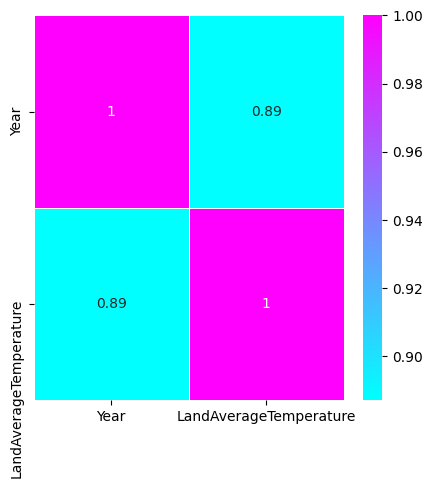

In [121]:
plt.figure(figsize = (5, 5))
sns.heatmap(df1.corr(), annot = True, linewidths=.5, cmap = plt.cm.cool)

In [122]:
lr = LinearRegression()

In [123]:
X1 = df1['Year']
y1 = df1['LandAverageTemperature']

X1 = X1.values.reshape(-1,1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size = 0.85)
lr.fit(X_train1, y_train1)
lr.score(X_test1, y_test1)

0.4770339131062482

In [124]:
y_pred1 = lr.predict(X_test1)

In [125]:
years = pd.DataFrame(X_test1)

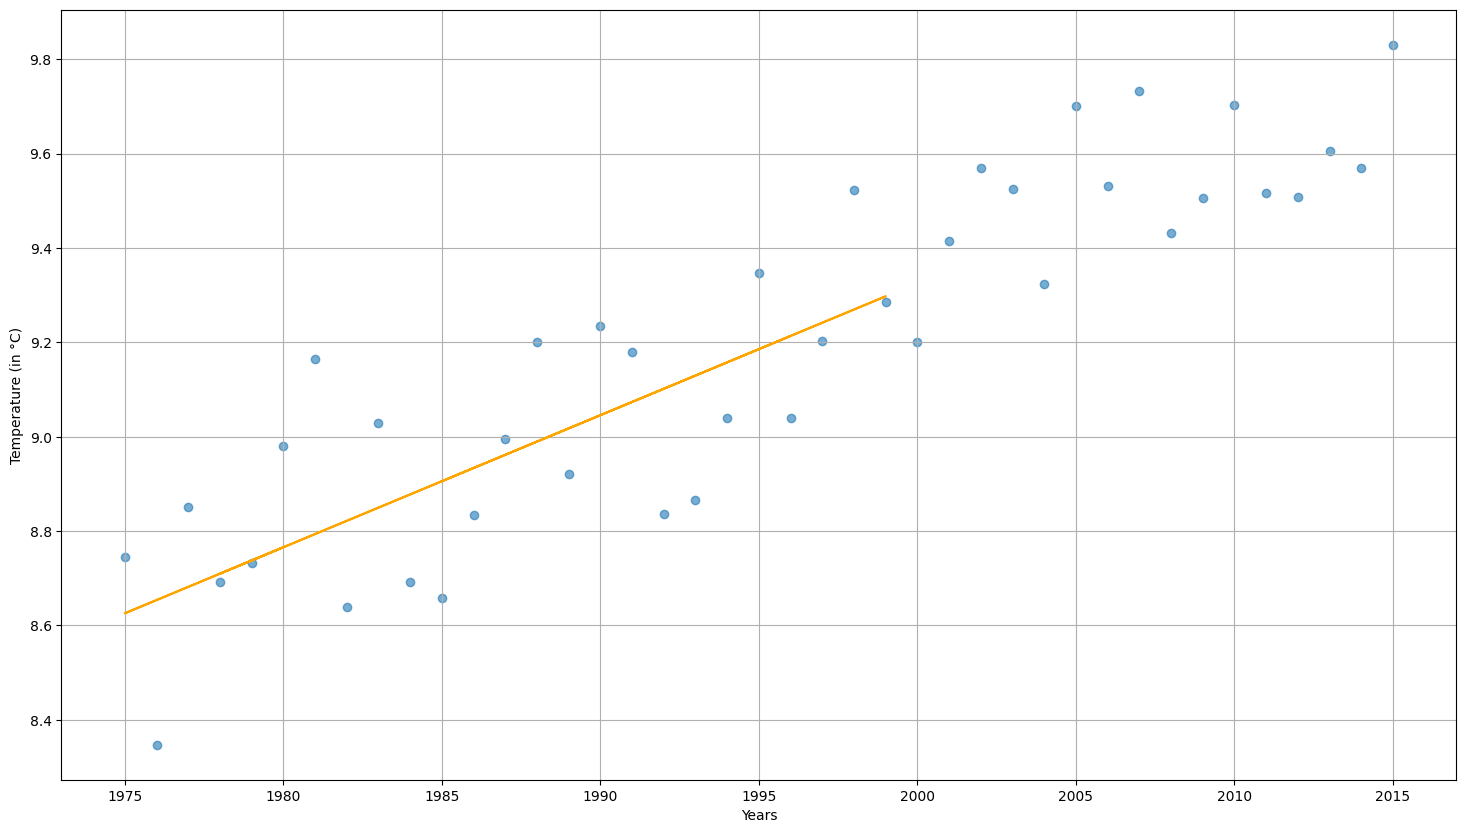

<Figure size 640x480 with 0 Axes>

In [126]:
plt.figure(figsize=(18,10))
plt.scatter(X1, y1, alpha=0.6)
plt.plot(X_test1, y_pred1, color="orange")
plt.grid()

plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')

plt.show()
plt.clf()

In [127]:
print(lr.coef_)
print(10 * lr.coef_)

[0.02799728]
[0.27997277]


In [128]:
print(lr.predict(np.array([2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100]).reshape(-1,1)))

[ 9.88567969 10.02566607 10.16565246 10.30563884 10.44562522 10.58561161
 10.72559799 10.86558437 11.00557076 11.14555714 11.28554352 11.42552991
 11.56551629 11.70550267 11.84548905 11.98547544 12.12546182]


In [129]:
print("20-30")
print(lr.predict(np.array([2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,
                              2030]).reshape(-1,1)))
print("31-40")
print(lr.predict(np.array([2031,2032,2033,2034,2035,2036,2037,2038,2039,
                              2040]).reshape(-1,1)))
print("41-50")
print(lr.predict(np.array([2041,2042,2043,2044,2045,2046,2047,2048,2049,
                              2050]).reshape(-1,1)))
print("51-60")
print(lr.predict(np.array([2051,2052,2053,2054,2055,2056,2057,2058,2059,
                              2060]).reshape(-1,1)))
print("61-70")
print(lr.predict(np.array([2061,2062,2063,2064,2065,2066,2067,2068,2069,
                              2070]).reshape(-1,1)))
print("71-80")
print(lr.predict(np.array([2071,2072,2073,2074,2075,2076,2077,2078,2079,
                              2080]).reshape(-1,1)))
print("81-90")
print(lr.predict(np.array([2081,2082,2083,2084,2085,2086,2087,2088,2089,
                              2090]).reshape(-1,1)))
print("91-100")
print(lr.predict(np.array([2091,2092,2093,2094,2095,2096,2097,2098,2099,
                              2100]).reshape(-1,1)))

20-30
[ 9.88567969  9.91367697  9.94167424  9.96967152  9.9976688  10.02566607
 10.05366335 10.08166063 10.1096579  10.13765518 10.16565246]
31-40
[10.19364973 10.22164701 10.24964429 10.27764156 10.30563884 10.33363612
 10.36163339 10.38963067 10.41762795 10.44562522]
41-50
[10.4736225  10.50161978 10.52961705 10.55761433 10.58561161 10.61360888
 10.64160616 10.66960344 10.69760071 10.72559799]
51-60
[10.75359527 10.78159254 10.80958982 10.8375871  10.86558437 10.89358165
 10.92157893 10.9495762  10.97757348 11.00557076]
61-70
[11.03356803 11.06156531 11.08956259 11.11755986 11.14555714 11.17355442
 11.20155169 11.22954897 11.25754625 11.28554352]
71-80
[11.3135408  11.34153808 11.36953535 11.39753263 11.42552991 11.45352718
 11.48152446 11.50952173 11.53751901 11.56551629]
81-90
[11.59351356 11.62151084 11.64950812 11.67750539 11.70550267 11.73349995
 11.76149722 11.7894945  11.81749178 11.84548905]
91-100
[11.87348633 11.90148361 11.92948088 11.95747816 11.98547544 12.01347271
 12.0

## Ridge Regression

In [130]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.01, solver="cholesky")

In [131]:
X1 = df1['Year']
y1 = df1['LandAverageTemperature']

X1 = X1.values.reshape(-1,1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size = 0.8)
ridge_reg.fit(X_train1, y_train1)
ridge_reg.score(X_test1, y_test1)

0.14947356602628858

In [132]:
y_pred1 = ridge_reg.predict(X_test1)

In [133]:
years = pd.DataFrame(X_test1)

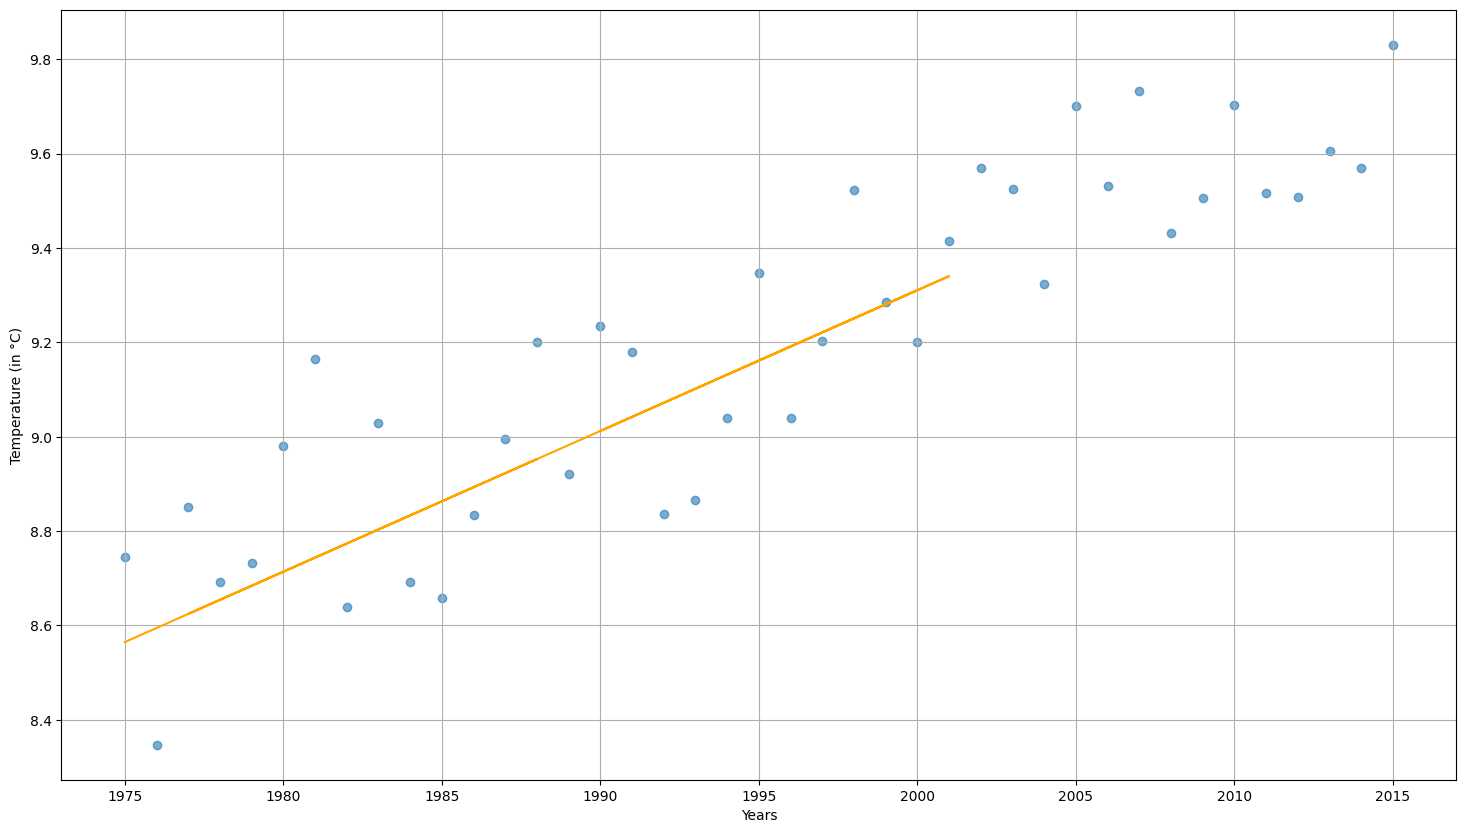

<Figure size 640x480 with 0 Axes>

In [134]:
plt.figure(figsize=(18,10))
plt.scatter(X1, y1, alpha=0.6)
plt.grid()
plt.plot(X_test1, y_pred1, color="orange")
plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')
plt.show()
plt.clf()

In [135]:
print(ridge_reg.predict(np.array([2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100]).reshape(-1,1)))

[ 9.90743074 10.05661064 10.20579054 10.35497044 10.50415034 10.65333024
 10.80251013 10.95169003 11.10086993 11.25004983 11.39922973 11.54840963
 11.69758953 11.84676943 11.99594932 12.14512922 12.29430912]


In [136]:
print("20-30")
print(ridge_reg.predict(np.array([2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,
                              2030]).reshape(-1,1)))
print("31-40")
print(ridge_reg.predict(np.array([2031,2032,2033,2034,2035,2036,2037,2038,2039,
                              2040]).reshape(-1,1)))
print("41-50")
print(ridge_reg.predict(np.array([2041,2042,2043,2044,2045,2046,2047,2048,2049,
                              2050]).reshape(-1,1)))
print("51-60")
print(ridge_reg.predict(np.array([2051,2052,2053,2054,2055,2056,2057,2058,2059,
                              2060]).reshape(-1,1)))
print("61-70")
print(ridge_reg.predict(np.array([2061,2062,2063,2064,2065,2066,2067,2068,2069,
                              2070]).reshape(-1,1)))
print("71-80")
print(ridge_reg.predict(np.array([2071,2072,2073,2074,2075,2076,2077,2078,2079,
                              2080]).reshape(-1,1)))
print("81-90")
print(ridge_reg.predict(np.array([2081,2082,2083,2084,2085,2086,2087,2088,2089,
                              2090]).reshape(-1,1)))
print("91-100")
print(ridge_reg.predict(np.array([2091,2092,2093,2094,2095,2096,2097,2098,2099,
                              2100]).reshape(-1,1)))

20-30
[ 9.90743074  9.93726672  9.9671027   9.99693868 10.02677466 10.05661064
 10.08644662 10.1162826  10.14611858 10.17595456 10.20579054]
31-40
[10.23562652 10.2654625  10.29529848 10.32513446 10.35497044 10.38480642
 10.4146424  10.44447838 10.47431436 10.50415034]
41-50
[10.53398632 10.5638223  10.59365828 10.62349426 10.65333024 10.68316622
 10.71300219 10.74283817 10.77267415 10.80251013]
51-60
[10.83234611 10.86218209 10.89201807 10.92185405 10.95169003 10.98152601
 11.01136199 11.04119797 11.07103395 11.10086993]
61-70
[11.13070591 11.16054189 11.19037787 11.22021385 11.25004983 11.27988581
 11.30972179 11.33955777 11.36939375 11.39922973]
71-80
[11.42906571 11.45890169 11.48873767 11.51857365 11.54840963 11.57824561
 11.60808159 11.63791757 11.66775355 11.69758953]
81-90
[11.72742551 11.75726149 11.78709747 11.81693345 11.84676943 11.8766054
 11.90644138 11.93627736 11.96611334 11.99594932]
91-100
[12.0257853  12.05562128 12.08545726 12.11529324 12.14512922 12.1749652
 12.204

# Plot evolucion de la temperatura

In [137]:
db_Temp_path = data_path + 'TempFuturas/'
os.listdir(db_Temp_path)

['FinalGraphTemp.csv',
 'FinalGraphTemp.xlsx',
 'GlobalTemperatures.csv',
 'GlobalTemperaturesGZ.csv',
 'GlobalTemperaturesGZ.xlsx',
 '~$GlobalTemperaturesGZ.xlsx']

In [138]:
temperaturesPlot = pd.read_csv(db_Temp_path + 'FinalGraphTemp.csv')
temperaturesPlot

,Year,Tobs(LR),TS (LR),Tobs(RR),Tobs(NN),TS(GZM)
0,2020,9.907717,10.219888,9.891546,9.91880,10.33453
1,2025,10.050359,10.426139,10.029857,9.94378,10.60653
2,2030,10.193002,10.632391,10.168168,9.96740,10.89553
3,2035,10.335644,10.838642,10.306479,9.98760,11.20053
4,2040,10.478286,11.044893,10.444790,10.01780,11.52453
5,2045,10.620929,11.251144,10.583101,10.04800,11.86853
6,2050,10.763571,11.457396,10.721412,10.06820,12.23453
7,2055,10.906214,11.663647,10.859723,10.08840,12.62553
8,2060,11.034545,11.869898,10.998034,10.11860,13.04353
9,2065,11.048856,12.076149,11.136345,10.13880,13.49053


In [140]:
temperaturesPlot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      17 non-null     int64  
 1   Tobs(LR)  17 non-null     float64
 2   TS (LR)   17 non-null     float64
 3   Tobs(RR)  17 non-null     float64
 4   Tobs(NN)  17 non-null     float64
 5   TS(GZM)   17 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 944.0 bytes


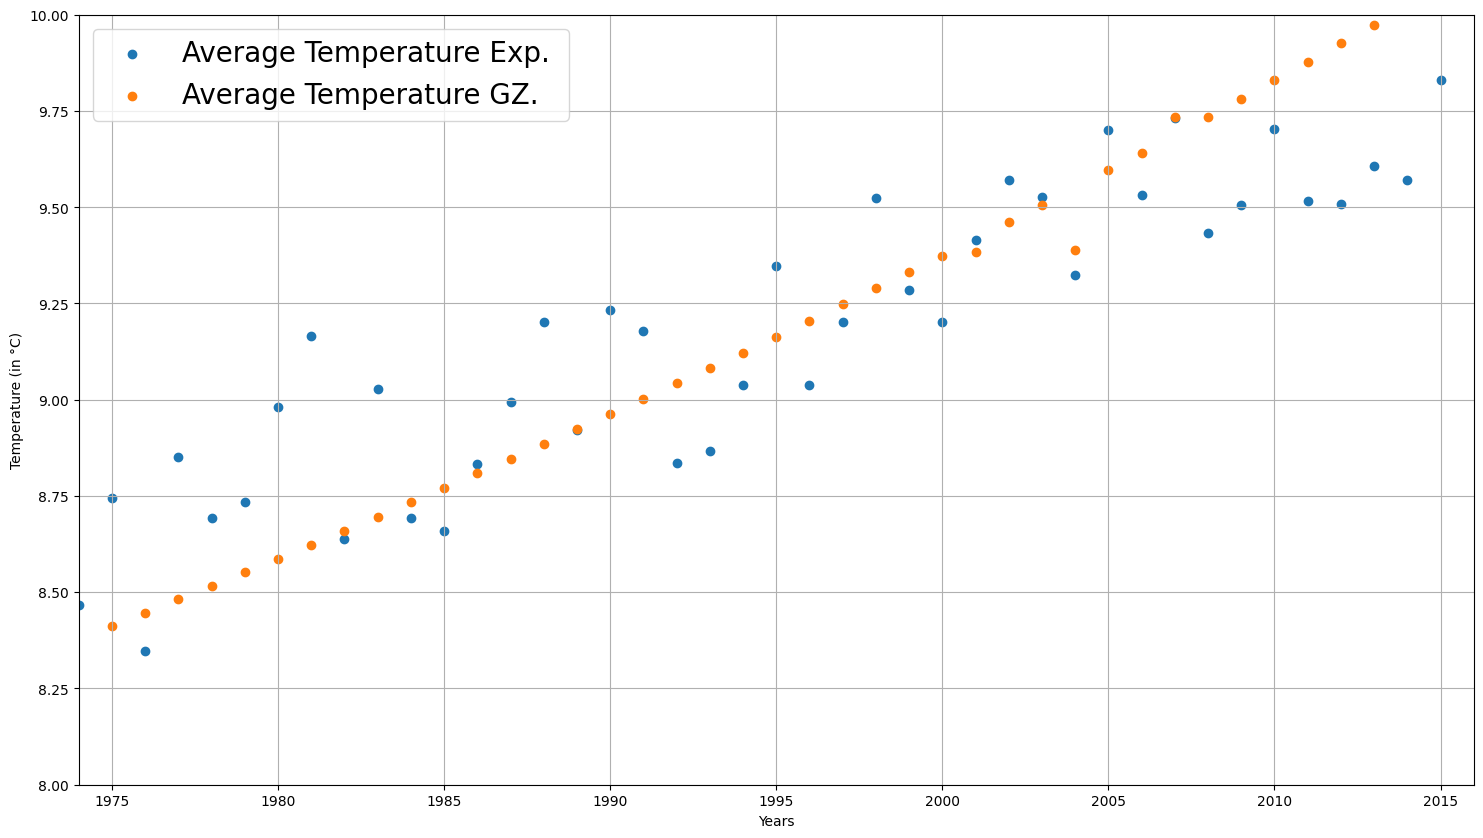

In [141]:
plt.figure(figsize=(18,10))
plt.scatter(data = df, x = 'Year',y = 'LandAverageTemperature',label='Average Temperature Exp. ')
plt.scatter(data = df_GZ, x = 'Ano',y = 'T_exp_corr',label='Average Temperature GZ.')
plt.legend(fontsize="20")

plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')

plt.grid()
plt.xlim(1974,2016)
plt.ylim(8,10)
plt.show()

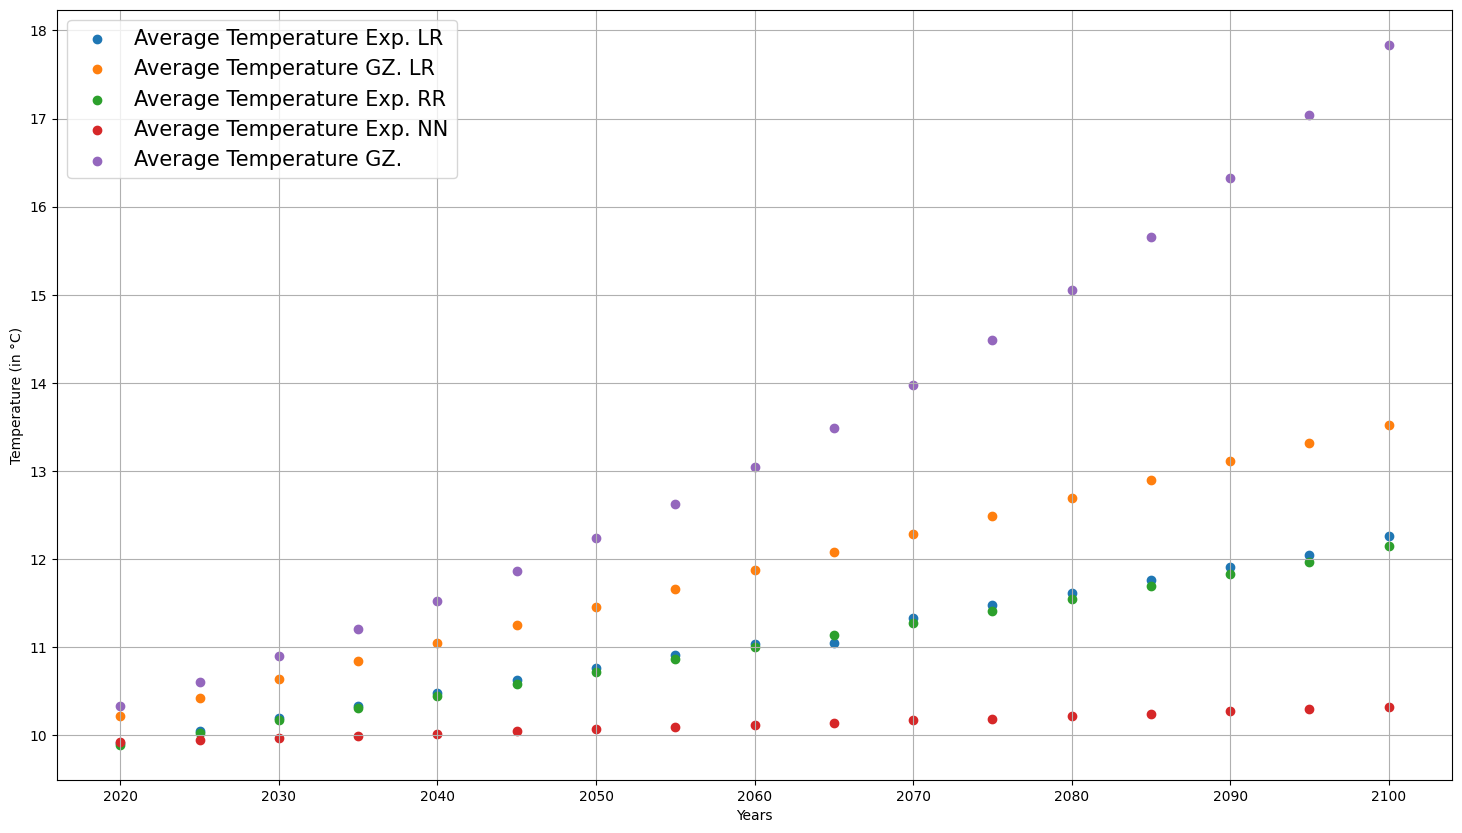

In [143]:
plt.figure(figsize=(18,10))
plt.scatter(data = temperaturesPlot, x = 'Year',y = 'Tobs(LR)',label='Average Temperature Exp. LR')
plt.scatter(data = temperaturesPlot, x = 'Year',y = 'TS (LR)',label='Average Temperature GZ. LR')
plt.scatter(data = temperaturesPlot, x = 'Year',y = 'Tobs(RR)',label='Average Temperature Exp. RR')
plt.scatter(data = temperaturesPlot, x = 'Year',y = 'Tobs(NN)',label='Average Temperature Exp. NN')
plt.scatter(data = temperaturesPlot, x = 'Year',y = 'TS(GZM)',label='Average Temperature GZ.')

plt.legend(fontsize="15")

plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')

plt.grid()
plt.show()

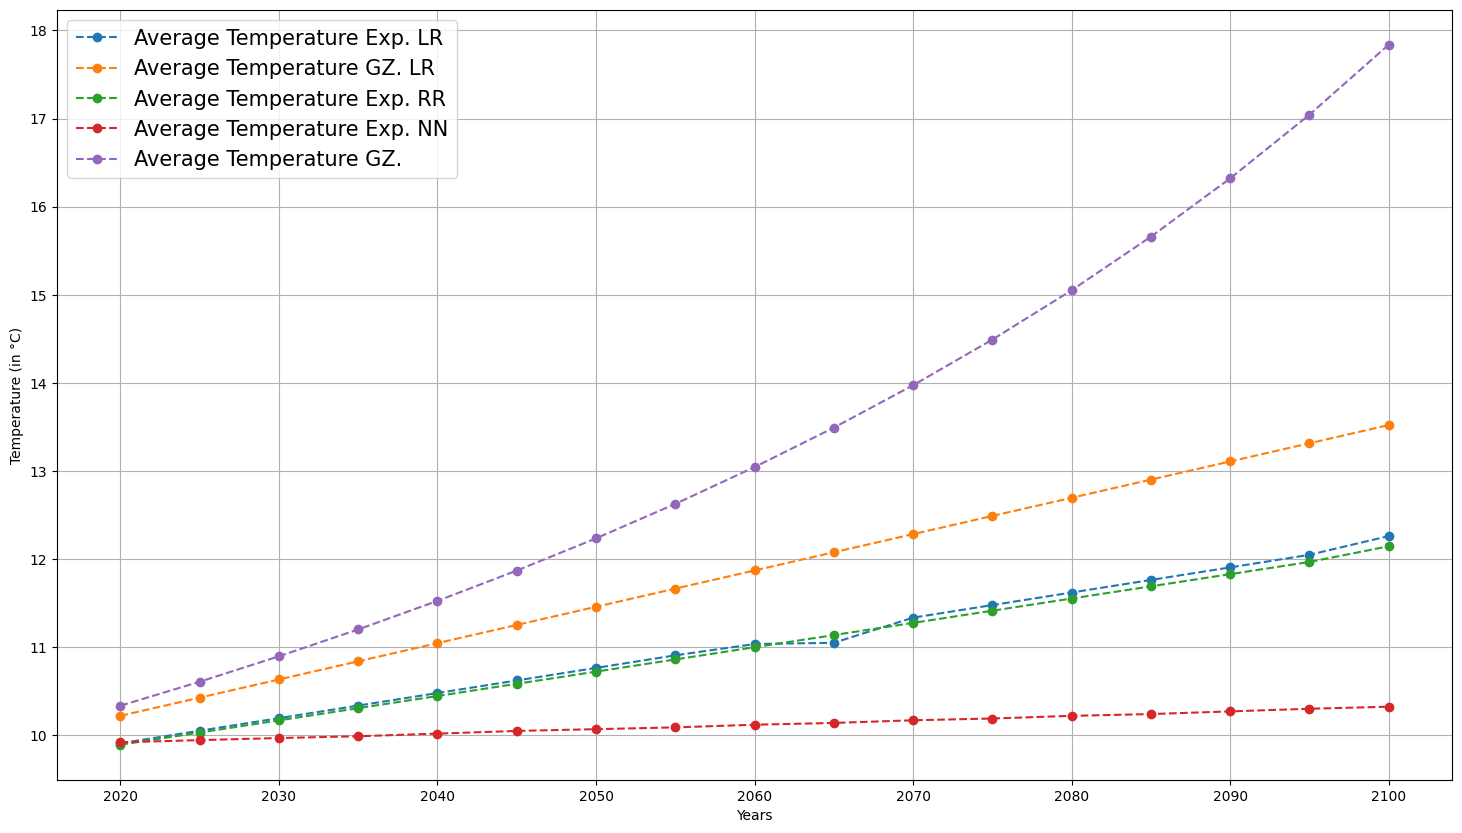

In [146]:
plt.figure(figsize=(18,10))
plt.plot(temperaturesPlot['Year'], temperaturesPlot['Tobs(LR)'] ,label='Average Temperature Exp. LR', linestyle='--', marker='o')
plt.plot(temperaturesPlot['Year'],temperaturesPlot['TS (LR)'] ,label='Average Temperature GZ. LR', linestyle='--', marker='o')
plt.plot(temperaturesPlot['Year'],temperaturesPlot['Tobs(RR)'] ,label='Average Temperature Exp. RR', linestyle='--', marker='o')
plt.plot(temperaturesPlot['Year'],temperaturesPlot['Tobs(NN)'] ,label='Average Temperature Exp. NN', linestyle='--', marker='o')
plt.plot(temperaturesPlot['Year'],temperaturesPlot['TS(GZM)'] ,label='Average Temperature GZ.', linestyle='--', marker='o')

plt.legend(fontsize="15")

plt.xlabel('Years')
plt.ylabel('Temperature (in °C)')

plt.grid()
plt.show()

In [151]:
temperaturesPlot.corr(method='pearson')

,Year,Tobs(LR),TS (LR),Tobs(RR),Tobs(NN),TS(GZM)
Year,1.000000,0.998544,1.000000,0.999921,0.999645,0.987929
Tobs(LR),0.998544,1.000000,0.998544,0.998792,0.998772,0.990709
TS (LR),1.000000,0.998544,1.000000,0.999921,0.999645,0.987929
Tobs(RR),0.999921,0.998792,0.999921,1.000000,0.999658,0.989015
Tobs(NN),0.999645,0.998772,0.999645,0.999658,1.000000,0.989693
TS(GZM),0.987929,0.990709,0.987929,0.989015,0.989693,1.000000


<AxesSubplot: >

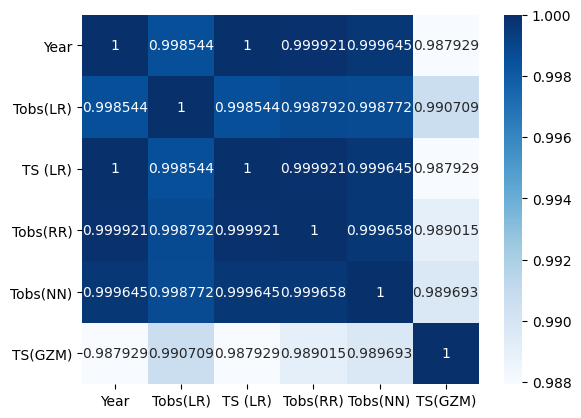

In [153]:
sns.heatmap(temperaturesPlot.corr(method='pearson'),annot=True,cmap='Blues', fmt='g')

<AxesSubplot: >

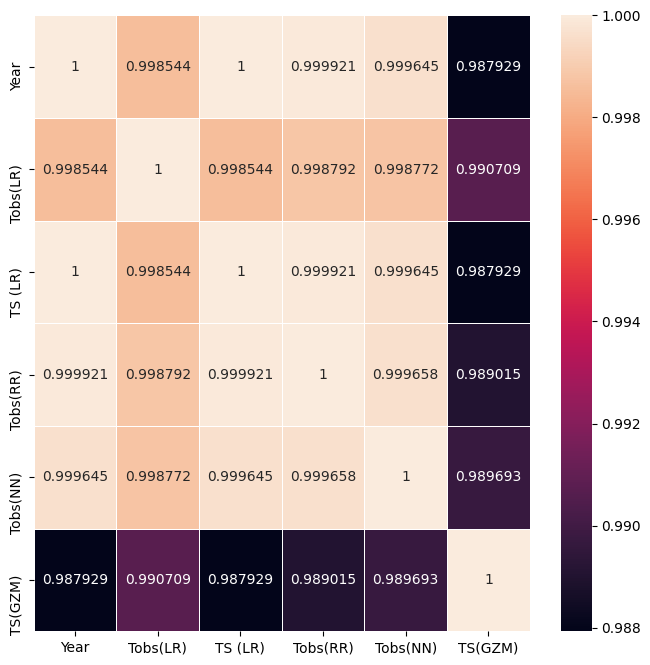

In [159]:
plt.figure(figsize = (8, 8))
sns.heatmap(temperaturesPlot.corr(method='pearson'), annot = True, linewidths=.5, cmap = "rocket", fmt='g')